In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pystan
import experiments
from experiment_manager import *
import utils

In [2]:
bbexperiment = BBExperiment()
bbexperiment.setup(n_items=100, max_workers_per_item=6, skip_gran=True)

100%|██████████| 100/100 [00:01<00:00, 51.21it/s]


In [3]:
# this just tells it to hold out N items from the dataset
# so that they can be used for semisupervised learning later
nsemisupervised = int(bbexperiment.stan_data["NITEMS"] / 5)
experiments.set_supervised_items(bbexperiment, nsemisupervised)

Pickled model loaded
Pickled model loaded
BEST AVAILABLE USER
0.5519115510034516 0.6362204550627614
t-test Ttest_relResult(statistic=-8.596043511993933, pvalue=1.8953373975248987e-16)
z-score 0.43034043777128994
baseline below thresh 0.0
model below thresh 0.0
SMALLEST AVERAGE DISTANCE
0.5519115510034516 0.6357234246455722
t-test Ttest_relResult(statistic=-8.992239726875829, pvalue=9.870827913619215e-18)
z-score 0.45017505730499835
baseline below thresh 0.0
model below thresh 0.0
DISTANCE EXPECTATION MAXIMIZATION
0.5519115510034516 0.6331857314186878
t-test Ttest_relResult(statistic=-8.801568142189955, pvalue=4.136776432662692e-17)
z-score 0.4406295387056828
baseline below thresh 0.0
model below thresh 0.0
MULTIDIMENSIONAL ANNOTATION SCALING
0.5519115510034516 0.6332339819194446
t-test Ttest_relResult(statistic=-8.163156392909844, pvalue=4.3219952389812095e-15)
z-score 0.4086689755372665
baseline below thresh 0.0
model below thresh 0.0
ORACLE
0.5519115510034516 0.7230658729068512
t-tes

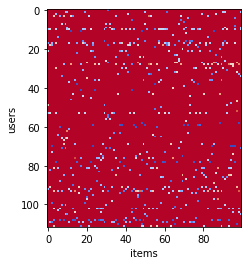

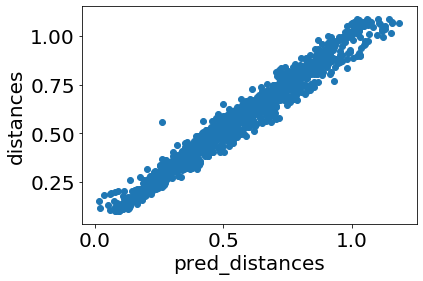

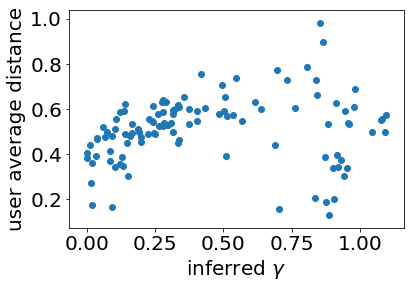

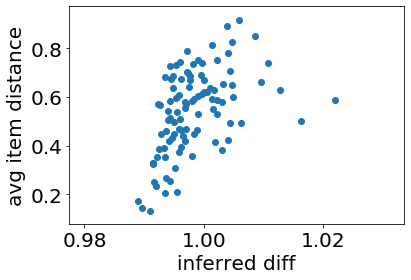

In [4]:
# first train without semisupervised learning
bbexperiment.train(dem_iter=500, mas_iter=500)
bbexperiment.test(debug=True)

100%|██████████| 100/100 [00:02<00:00, 43.56it/s]


Pickled model loaded
Pickled model loaded
BEST AVAILABLE USER
0.5530779216546101 0.6405681410253152
t-test Ttest_relResult(statistic=-8.598802537939608, pvalue=1.857295091307261e-16)
z-score 0.43047856183169375
baseline below thresh 0.0
model below thresh 0.0
BEST HONEYPOT USER
0.5530779216546101 0.6252925165350044
t-test Ttest_relResult(statistic=-7.734307150599277, pvalue=8.573789581177122e-14)
z-score 0.38719965998339395
baseline below thresh 0.0
model below thresh 0.0
SMALLEST AVERAGE DISTANCE
0.5530779216546101 0.6357234246455722
t-test Ttest_relResult(statistic=-8.984555549500778, pvalue=1.0461615776207364e-17)
z-score 0.44979036727279015
baseline below thresh 0.0
model below thresh 0.0
DISTANCE EXPECTATION MAXIMIZATION
0.5530779216546101 0.6335655017830623
t-test Ttest_relResult(statistic=-8.826658831151173, pvalue=3.4297695243800963e-17)
z-score 0.44188564426825794
baseline below thresh 0.0
model below thresh 0.0
MULTIDIMENSIONAL ANNOTATION SCALING
0.5530779216546101 0.66839370

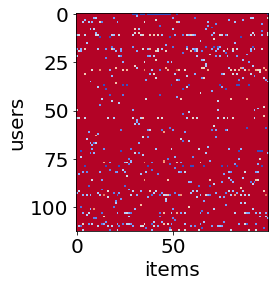

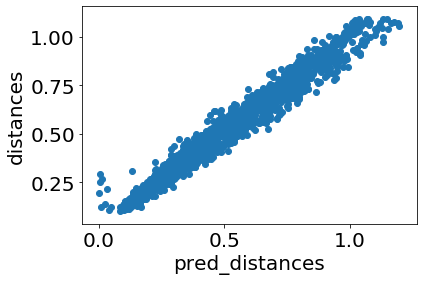

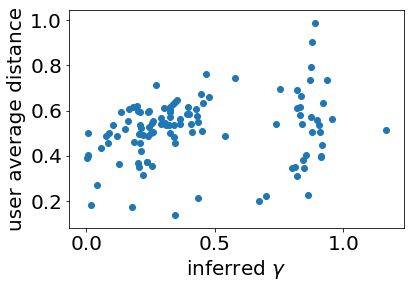

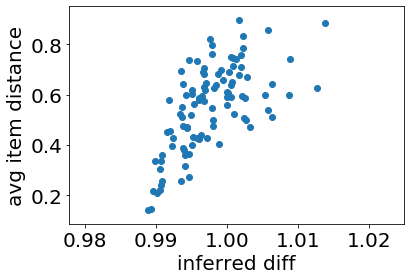

In [5]:
# now add those items back in
# (but not to the test set.. test sets must be comparable between unsup and semisup)
experiments.make_supervised_standata(bbexperiment)
bbexperiment.train(dem_iter=500, mas_iter=500)
bbexperiment.test(debug=True)